In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
import pickle

In [2]:
SOUND_FOLDER_training = "./Audio_Dataset/training_data"
SOUND_FOLDER_testing = "./Audio_Dataset/testing_data"
FEAT_FOLDER = "./Features"

## **Dataset analysis**

In [3]:
# Create Dataframe for Training Data
df_training = pd.DataFrame(columns=['path', 'file_name', 'class'])
print(df_training)

Empty DataFrame
Columns: [path, file_name, class]
Index: []


In [4]:
# Create Dataframe for Testing Data
df_testing = pd.DataFrame(columns=['path', 'file_name', 'class'])
print(df_testing)

Empty DataFrame
Columns: [path, file_name, class]
Index: []


In [5]:
path_training = os.path.join(SOUND_FOLDER_training)
path_testing = os.path.join(SOUND_FOLDER_testing)

In [6]:
# Retrieve list of files related to Training Data
for (root, dirs, file) in os.walk(path_training):
    for f in file:
      if '.wav' in f:
        path_complete = root+"/"+f
        db_new_row = {'path':path_complete}
        db_new_row['file_name'] = os.path.basename(path_complete).split('/')[-1]
        db_new_row['class'] = os.path.split(path_complete)[0].split("/")[-1]
        s = pd.Series(db_new_row)
        df_training = pd.concat([df_training, s.to_frame().T], ignore_index=True)
df_training

,path,file_name,class
0,./Audio_Dataset/training_data/disco/disco.0005...,disco.00052.wav,disco
1,./Audio_Dataset/training_data/disco/disco.0004...,disco.00046.wav,disco
2,./Audio_Dataset/training_data/disco/disco.0004...,disco.00047.wav,disco
3,./Audio_Dataset/training_data/disco/disco.0005...,disco.00053.wav,disco
4,./Audio_Dataset/training_data/disco/disco.0004...,disco.00045.wav,disco
...,...,...,...
155,./Audio_Dataset/training_data/hiphop/hiphop.00...,hiphop.00010.wav,hiphop
156,./Audio_Dataset/training_data/hiphop/hiphop.00...,hiphop.00006.wav,hiphop
157,./Audio_Dataset/training_data/hiphop/hiphop.00...,hiphop.00012.wav,hiphop
158,./Audio_Dataset/training_data/hiphop/hiphop.00...,hiphop.00013.wav,hiphop


In [7]:
# Retrieve list of files related to Testing Data
for (root, dirs, file) in os.walk(path_testing):
    for f in file:
      if '.wav' in f:
        path_complete = root+"/"+f
        db_new_row = {'path':path_complete}
        db_new_row['file_name'] = os.path.basename(path_complete).split('/')[-1]
        db_new_row['class'] = os.path.split(path_complete)[0].split("/")[-1]
        s = pd.Series(db_new_row)
        df_testing = pd.concat([df_testing, s.to_frame().T], ignore_index=True)
df_testing

,path,file_name,class
0,./Audio_Dataset/testing_data/disco/disco.00091...,disco.00091.wav,disco
1,./Audio_Dataset/testing_data/disco/disco.00085...,disco.00085.wav,disco
2,./Audio_Dataset/testing_data/disco/disco.00084...,disco.00084.wav,disco
3,./Audio_Dataset/testing_data/disco/disco.00090...,disco.00090.wav,disco
4,./Audio_Dataset/testing_data/disco/disco.00086...,disco.00086.wav,disco
5,./Audio_Dataset/testing_data/disco/disco.00092...,disco.00092.wav,disco
6,./Audio_Dataset/testing_data/disco/disco.00093...,disco.00093.wav,disco
7,./Audio_Dataset/testing_data/disco/disco.00087...,disco.00087.wav,disco
8,./Audio_Dataset/testing_data/disco/disco.00083...,disco.00083.wav,disco
9,./Audio_Dataset/testing_data/disco/disco.00097...,disco.00097.wav,disco


In [8]:
print(df_training.loc[1,['path', 'file_name']])
print(df_testing.loc[1,['path','file_name']])

path         ./Audio_Dataset/training_data/disco/disco.0004...
file_name                                      disco.00046.wav
Name: 1, dtype: object
path         ./Audio_Dataset/testing_data/disco/disco.00085...
file_name                                      disco.00085.wav
Name: 1, dtype: object


In [9]:
# Count occurrences in classes
df_classes = pd.DataFrame(columns=['class','num'])
count = df_training['class'].value_counts(dropna=False)
classes = count.index.values
values = count.values

df_classes['class'] = classes
df_classes['num'] = count.values

print(df_classes)



    class  num
0   disco   80
1  hiphop   80


/var/folders/vv/hj__r4qd6db628cs1n1g0ldm0000gn/T/ipykernel_2492/2840464404.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'disco'), Text(1, 0, 'hiphop')]

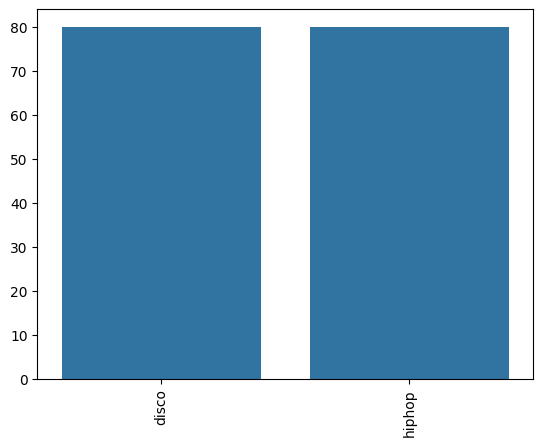

In [10]:
plot = sns.barplot(x=classes, y=values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

## **Save Label file**

In [11]:
path_training = os.path.join(SOUND_FOLDER_training)
print("save labels in ")

if os.path.isdir(path_training):
    # exists
    print("found")
else:
    # doesn’t exist
    print(path_training + " Not found")
    os.mkdir(path_training)
    print(path_training + " Created")


print("save labels to -> "+path_training + "label_training.csv")
path_to_save = os.path.join(path_training, "label_training.csv")
df_training.to_csv(path_or_buf=path_to_save, index=False)


save labels in 
found
save labels to -> ./Audio_Dataset/training_datalabel_training.csv


In [12]:
path_testing = os.path.join(SOUND_FOLDER_testing)
print("save labels in ")

if os.path.isdir(path_testing):
    # exists
    print("found")
else:
    # doesn’t exist
    print(path_testing + " Not found")
    os.mkdir(path_testing)
    print(path_testing + " Created")


print("save labels to -> "+path_testing + "label_testing.csv")
path_to_save = os.path.join(path_testing, "label_testing.csv")
df_testing.to_csv(path_or_buf=path_to_save, index=False)

save labels in 
found
save labels to -> ./Audio_Dataset/testing_datalabel_testing.csv


In [13]:
path_classes = os.path.join("./Audio_Dataset")
print("Save classes in")

if os.path.isdir(path_classes):
    # exists
    print("found")
else:
    # doesn't exist
    print(path_classes + " Not found")
    os.mkdir(path_classes)
    print(path_classes + " Created")

print("save classes to -> "+path_classes + "classes.csv")
path_to_save = os.path.join(path_classes, "classes.csv")
df_classes.to_csv(path_or_buf=path_to_save, index=False)

Save classes in
found
save classes to -> ./Audio_Datasetclasses.csv
